In [1]:
import os
import pathlib
from hw2_soln import *

%matplotlib inline

# Problem a) 
Using the training data in TrainingSamplesDCT 8.mat compute the histogram estimate of the prior $P_Y(i)$, $i \in \{cheetah, grass\}$. Using the results of problem 2 compute the maximum likelihood estimate
for the prior probabilities. Compare the result with the estimates that you obtained last week. If they
are the same, interpret what you did last week. If they are different, explain the differences.

## Answer for problem a)
$$ \pi_i = \frac{C_i} {n} $$

$$ \pi_1 (Cheetah) = \frac{C_1} {n} = \frac{250}{250+1053} = 0.1918649270913277 $$ 
$$ \pi_2 (Grass)= \frac{C_i} {n} = \frac{1053}{250+1053} = 0.8081350729086723 $$

Last week, we calculate the prior based on the frequency of the occurancy of each class in the training set. This is the same as the maximum likelihood estimate.

### Code Answers form HW1

In [2]:
data_dir = os.path.join(os.getcwd(), 'data')
plot_dir = os.path.join(os.getcwd(), 'plots')
data_dir = pathlib.Path(data_dir)
old_mat_fname = data_dir / "TrainingSamplesDCT_8.mat"

load_and_compute_prior(old_mat_fname)


The prior P_Y_cheetah from HW1: 0.1918649270913277
The prior P_Y_grass from HW1: 0.8081350729086723


### Answers from HW2 a)

In [3]:
mat_contents = sio.loadmat(data_dir / "TrainingSamplesDCT_8_new.mat")
TrainsampleDCT_BG = mat_contents["TrainsampleDCT_BG"]
TrainsampleDCT_FG = mat_contents["TrainsampleDCT_FG"]

In [4]:
m_FG, n_FG = TrainsampleDCT_FG.shape
m_BG, n_BG = TrainsampleDCT_BG.shape

# Using the results of problem 2 compute the maximum likelihood estimate for the prior probabilities.
P_FG = m_FG / (m_FG + m_BG)
P_BG = m_BG / (m_FG + m_BG)
assert P_FG + P_BG == 1

print(f"\nThe prior P_Y_cheetah: {P_FG}")
print(f"The prior P_Y_grass: {P_BG}")


The prior P_Y_cheetah: 0.1918649270913277
The prior P_Y_grass: 0.8081350729086723


# Problem b)
 Using the training data in TrainingSamplesDCT_8.mat, compute the maximum likelihood estimates for the parameters of the class conditional densities $P_{X|Y} (x|cheetah)$ and $P_{X|Y}(x|grass)$ under the Gaussian assumption. 


Denoting by $X = \{X_1, . . . , X_64\}$ the vector of DCT coefficients, create 64 plots with the marginal densities for the two classes $P_{X_k|Y} (x_k|cheetah)$ and $P_{X_k|Y} (x_k|grass)$, $k = 1, . . . , 64$ on each. 


Select, by visual inspection, what you think are the best 8 features for classification purposes and what you think are the worst 8 features. Hand in the plots of the marginal densities for the best-8 and worst-8 features  In each subplot indicate the feature that it refers to

## Answers for problem b)

The best 8 features are those that have the largest divergence from the distributions. For instance, if mean of Cheetah is visually saparated from mean of Grass or the variance of Cheetah is visually saparated.

On the other hand, the worst 8 features are those that have the smallest divergence from the distributions.


By visual inspection,

The index of best 8 features are $\{1, 18, 25, 27, 32, 33, 40, 41\}$.

The index of worst 8 features are $\{3, 4, 5, 59, 60, 62, 63, 64\}$.

*Note: The full 64 features plots are included in the appendix of the report.*

### Code Answers from HW2 b)

In [5]:
mu_FG = np.mean(TrainsampleDCT_FG, axis=0).reshape(-1, 1)
mu_BG = np.mean(TrainsampleDCT_BG, axis=0).reshape(-1, 1)

# std sigma
std_FG = np.std(TrainsampleDCT_FG, axis=0)
std_BG = np.std(TrainsampleDCT_BG, axis=0)

# covariance Sigma
cov_FG, cov_BG = np.cov(TrainsampleDCT_FG.T), np.cov(TrainsampleDCT_BG.T)

In [6]:
def plot_8(data, title: str, size) -> None:
    """
    Plot best8 or worst8 figures.
    """
    fig = plt.figure(title, figsize=(size, size))
    for plt_idx, j in enumerate(data):
        # since j start from 1, we need to subtract 1
        i = j - 1
        x_FG = np.linspace(-std_FG[i] * 3 + mu_FG[i], std_FG[i] * 3 + mu_FG[i])
        y_FG = univariate_gaussian_normpdf(x_FG, mu_FG[i], std_FG[i])

        x_BG = np.linspace(-std_BG[i] * 3 + mu_BG[i], std_BG[i] * 3 + mu_BG[i])
        y_BG = univariate_gaussian_normpdf(x_BG, mu_BG[i], std_BG[i])
        plt.subplot(2, 4, plt_idx + 1).set_title(f"Feature {j}")
        plt.plot(x_FG, y_FG, "-", label="Cheetah")
        plt.plot(x_BG, y_BG, "--", label="Grass")
        plt.legend(loc="best")
    fig.suptitle(title)
    plt.show()

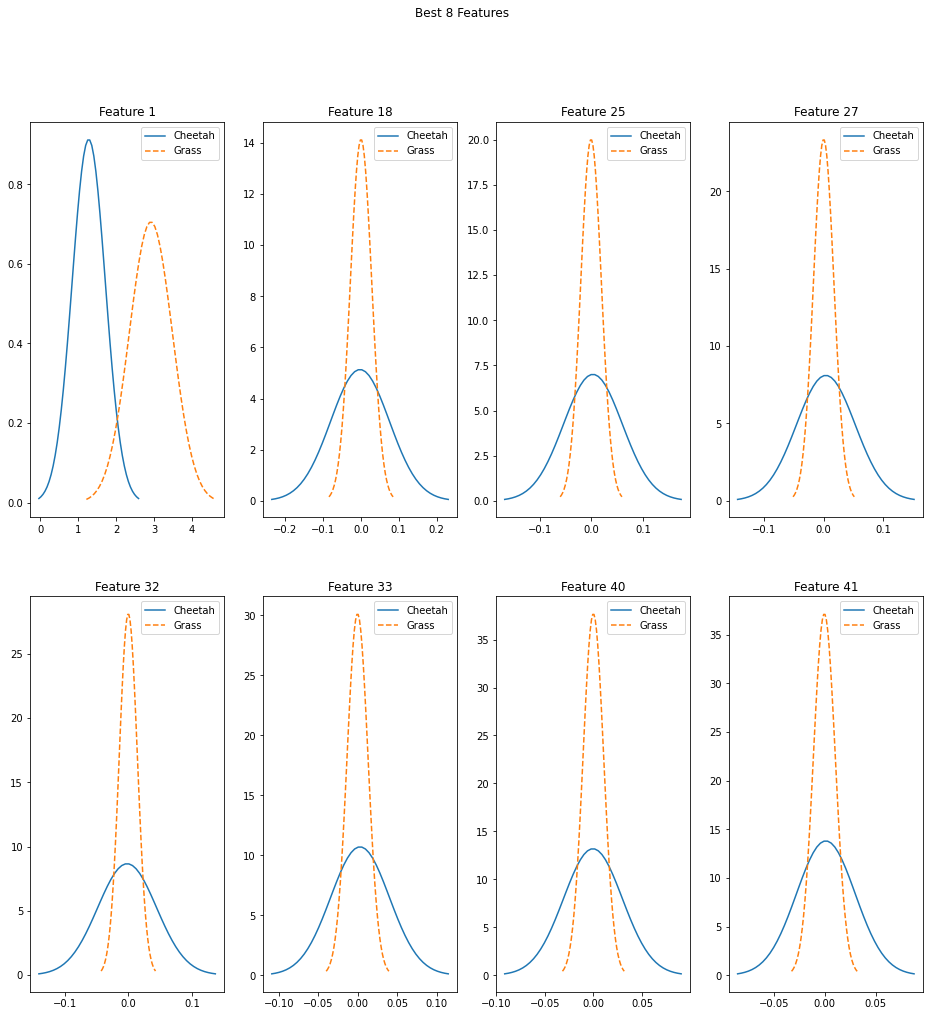

In [7]:
best_8 = [1, 18, 25, 27, 32, 33, 40, 41]
plot_8(best_8, "Best 8 Features", size=16)

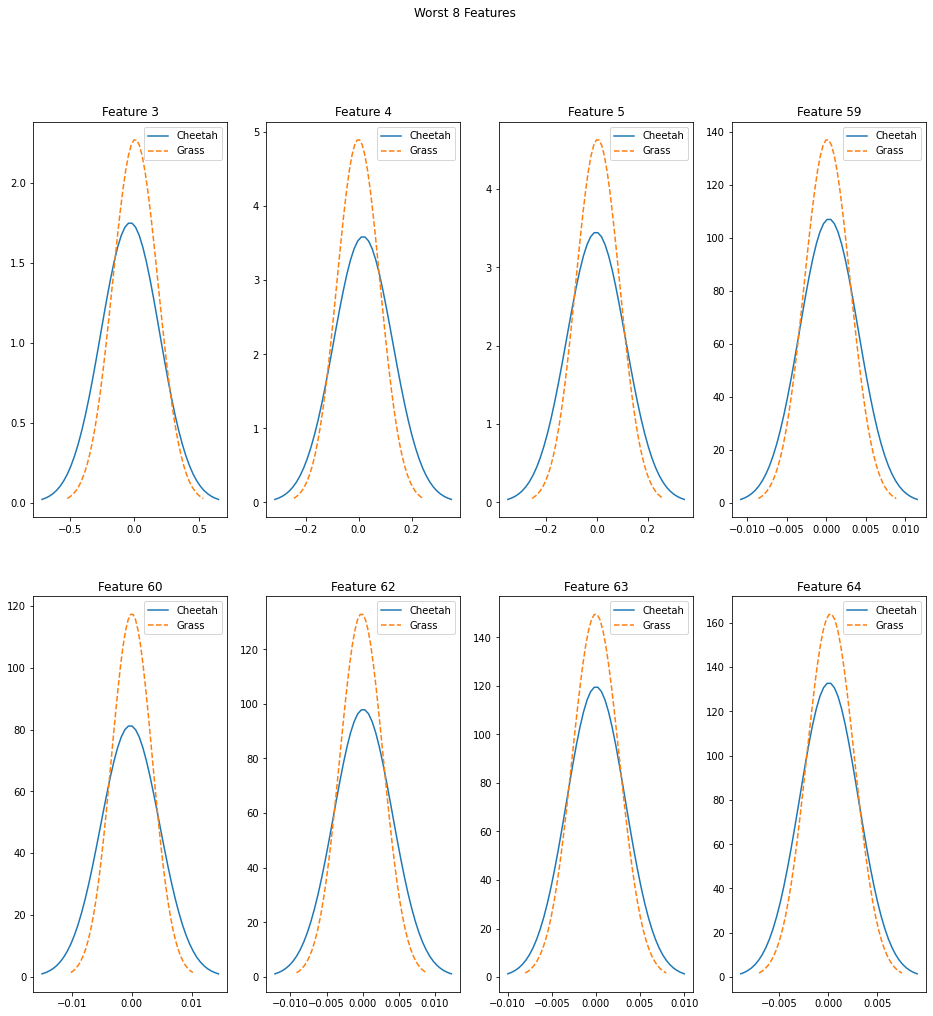

In [8]:
worst_8 = [3, 4, 5, 59, 60, 62, 63, 64]
plot_8(worst_8, "Worst 8 Features", size=16)

# Problem c)
Compute the Bayesian decision rule and classify the locations of the cheetah image using 
    
    i) the 64-dimensional Gaussians, and 
    
    ii) the 8-dimensional Gaussians associated with the best 8 features. For the two cases, plot the classification masks and compute the probability of error by comparing with cheetah mask.bmp. Can you explain the results?

## Answers for problem c)

### Bayesian decision rule
$$i^*(x) = \argmax_i g_i(x)\\
        i^*(x) = \argmax_i \log g_i(x) \\
        g_i(x) = - \frac{1}{2} (x-\mu_i)^T \Sigma_i^{-1} (x-\mu_i) - \frac{d}{2} \log(2 \pi) - \frac{1}{2} \log(\det(\Sigma_i)) + \log P_Y(i)$$
        dropping the constant term, we get
$$\log g_i(x) = (x - \mu_i)^T \Sigma_i^{-1} (x - \mu_i) + \log|\Sigma_i| - 2logP_Y(i)$$

## Decision boundary interpretation
$$ g_i(x) = x^T W_i x + w_i^T x + w_{i0} $$

Where
$$W_i = \Sigma_i^{-1}$$
$$w_i = -2 \Sigma_i^{-1} \mu_i$$    
$$w_{i0} = \mu_i^T \Sigma_i^{-1} \mu_i + \log det(\Sigma_i) - 2 \log P_Y(i)$$

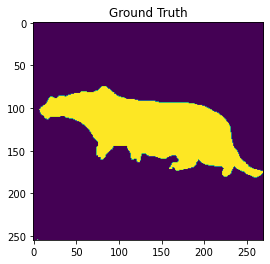

In [9]:
#) 64-dimensional feature vector
img = np.asarray(Image.open(str(data_dir / "cheetah.bmp"), "r"))
img = im2double(img)

# cheetah_mask
ground_truth = np.asarray(Image.open(str(data_dir / "cheetah_mask.bmp"), "r"))
plt.imshow(ground_truth)
plt.title("Ground Truth")
plt.show()

# placeholder
processed_img = np.zeros([img.shape[0] - 8, img.shape[1] - 8], dtype=bool)

# zig-zag pattern
zigzag = np.loadtxt(data_dir / "Zig-Zag Pattern.txt", dtype=np.int64)

# log prior
logp_FG = np.log(P_FG)
logp_BG = np.log(P_BG)

# log determinant of covariance matrix
logdet_FG = np.log(np.linalg.det(cov_FG))
logdet_BG = np.log(np.linalg.det(cov_BG))

W_FG = np.linalg.inv(cov_FG)
W_BG = np.linalg.inv(cov_BG)

w_FG = -2 * W_FG @ mu_FG
w_BG = -2 * W_BG @ mu_BG

w0_FG = mu_FG.T @ W_FG @ mu_FG + logdet_FG - 2 * logp_FG
w0_BG = mu_BG.T @ W_BG @ mu_BG + logdet_BG - 2 * logp_BG



### Code Answers for problem c) i)

In [10]:
# Feature vector 64 x 1
x_64 = np.zeros((64, 1), dtype=np.float64)
for i in (range(processed_img.shape[0])):
    for j in range(processed_img.shape[1]):
        # 8 x 8 block
        block = img[i : i + 8, j : j + 8]
        # DCT transform on the block
        block_DCT = dct2(block)
        # zigzag pattern mapping
        for k in range(block_DCT.shape[0]):
            for p in range(block_DCT.shape[1]):
                loc = zigzag[k, p]
                x_64[loc, :] = block_DCT[k, p]
        
        if g(x_64, W_FG, w_FG, w0_FG) >= g(x_64, W_BG, w_BG, w0_BG):
            processed_img[i, j] = 0  
        else:
            processed_img[i, j] = 1

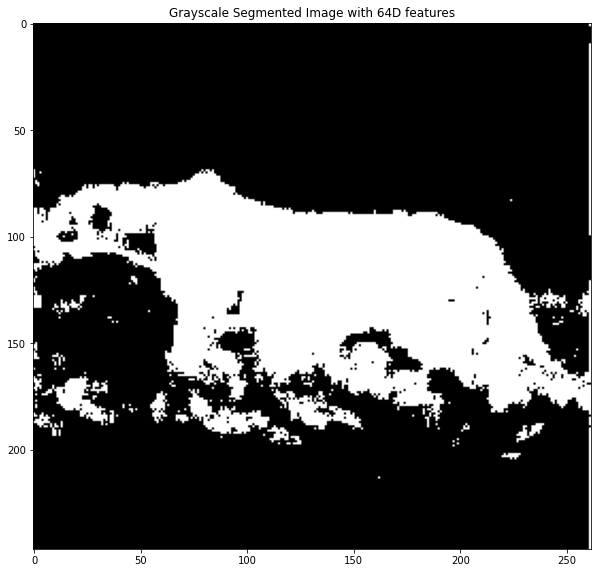

The probability of error: 0.09126309608430938
FG error: 0.014370924374942053
BG error is: 0.07689217170936737


In [11]:
colormap_gray255(processed_img, title="Grayscale Segmented Image with 64D features")
_ = calculate_error(processed_img, ground_truth)


### Code Answers for problem c) ii)

In [12]:
# 8 dimensional feature vector
# best_8 should minus one to match the index in python
best_8 = np.array(best_8, dtype=int) - 1

# mean mu
mu_FG_8 = np.mean(TrainsampleDCT_FG[:, best_8], axis=0).reshape(-1, 1)
mu_BG_8 = np.mean(TrainsampleDCT_BG[:, best_8], axis=0).reshape(-1, 1)

# covariance Sigma
cov_FG_8, cov_BG_8 = np.cov(TrainsampleDCT_FG[:, best_8].T), np.cov(TrainsampleDCT_BG[:, best_8].T)

logdet_FG_8 = np.log(np.linalg.det(cov_FG_8))
logdet_BG_8 = np.log(np.linalg.det(cov_BG_8))

W_FG_8 = np.linalg.inv(cov_FG_8)
W_BG_8 = np.linalg.inv(cov_BG_8)

w_FG_8 = -2 * W_FG_8 @ mu_FG_8
w_BG_8 = -2 * W_BG_8 @ mu_BG_8

w0_FG_8 = mu_FG_8.T @ W_FG_8 @ mu_FG_8 + logdet_FG_8 - 2 * logp_FG
w0_BG_8 = mu_BG_8.T @ W_BG_8 @ mu_BG_8 + logdet_BG_8 - 2 * logp_BG

# Feature vector 64 x 1 palceholder for selecting the best 8 features
x_64 = np.zeros((64, 1), dtype=np.float64)
for i in (range(processed_img.shape[0])):
    for j in range(processed_img.shape[1]):
        # 8 x 8 block
        block = img[i : i + 8, j : j + 8]
        # DCT transform on the block
        block_DCT = dct2(block)
        # zigzag pattern mapping
        for k in range(block_DCT.shape[0]):
            for p in range(block_DCT.shape[1]):
                loc = zigzag[k, p]
                x_64[loc, :] = block_DCT[k, p]
        x_8 = x_64[best_8, :]
        if g(x_8, W_FG_8, w_FG_8, w0_FG_8) > g(x_8, W_BG_8, w_BG_8, w0_BG_8):
            processed_img[i, j] = 0  
        else:
            processed_img[i, j] = 1

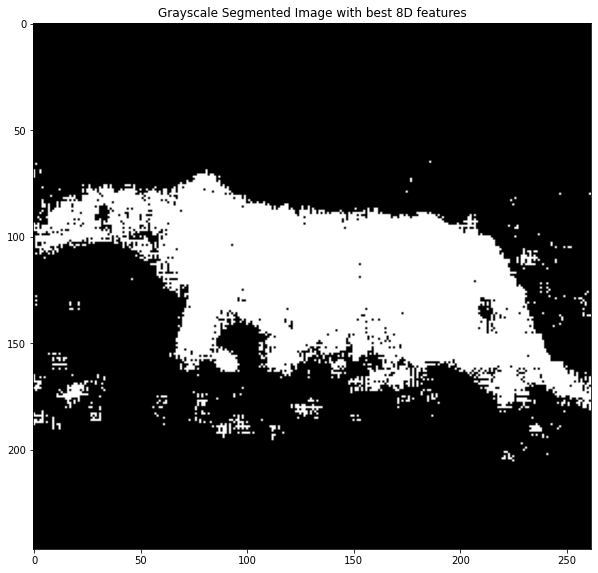

The probability of error: 0.0585808325864573
FG error: 0.021927249126927714
BG error is: 0.03665358345952962


In [13]:
colormap_gray255(processed_img, title="Grayscale Segmented Image with best 8D features")
_ = calculate_error(processed_img, ground_truth)

In [14]:
# 8 dimensional feature vector
# worest_8 should minus one to match the index in python
worst_8 = np.array(worst_8, dtype=int) - 1

# mean mu
mu_FG_8 = np.mean(TrainsampleDCT_FG[:, worst_8], axis=0).reshape(-1, 1)
mu_BG_8 = np.mean(TrainsampleDCT_BG[:, worst_8], axis=0).reshape(-1, 1)

# covariance Sigma
cov_FG_8, cov_BG_8 = np.cov(TrainsampleDCT_FG[:, worst_8].T), np.cov(TrainsampleDCT_BG[:, worst_8].T)

logdet_FG_8 = np.log(np.linalg.det(cov_FG_8))
logdet_BG_8 = np.log(np.linalg.det(cov_BG_8))

W_FG_8 = np.linalg.inv(cov_FG_8)
W_BG_8 = np.linalg.inv(cov_BG_8)

w_FG_8 = -2 * W_FG_8 @ mu_FG_8
w_BG_8 = -2 * W_BG_8 @ mu_BG_8

w0_FG_8 = mu_FG_8.T @ W_FG_8 @ mu_FG_8 + logdet_FG_8 - 2 * logp_FG
w0_BG_8 = mu_BG_8.T @ W_BG_8 @ mu_BG_8 + logdet_BG_8 - 2 * logp_BG

# Feature vector 64 x 1 palceholder for selecting the worst 8 features
x_64 = np.zeros((64, 1), dtype=np.float64)
for i in (range(processed_img.shape[0])):
    for j in range(processed_img.shape[1]):
        # 8 x 8 block
        block = img[i : i + 8, j : j + 8]
        # DCT transform on the block
        block_DCT = dct2(block)
        # zigzag pattern mapping
        for k in range(block_DCT.shape[0]):
            for p in range(block_DCT.shape[1]):
                loc = zigzag[k, p]
                x_64[loc, :] = block_DCT[k, p]
        x_8 = x_64[worst_8, :]
        if g(x_8, W_FG_8, w_FG_8, w0_FG_8) > g(x_8, W_BG_8, w_BG_8, w0_BG_8):
            processed_img[i, j] = 0  
        else:
            processed_img[i, j] = 1

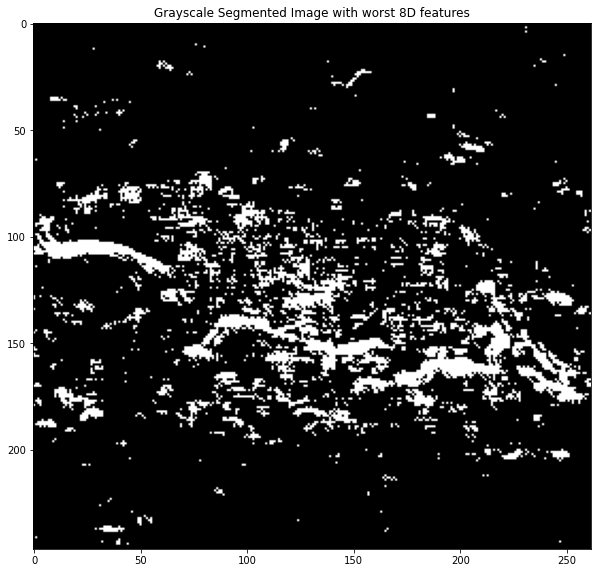

The probability of error: 0.18371604289643662
FG error: 0.14200945699539513
BG error is: 0.0417065859010415


In [15]:
colormap_gray255(processed_img, title="Grayscale Segmented Image with worst 8D features")
_ = calculate_error(processed_img, ground_truth)

## Discussion for problem c)

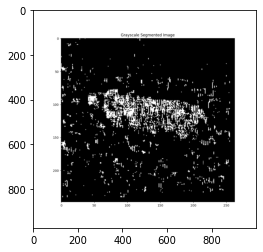

hw1_result:
The probability of error: 0.17544155525573413
FG error: 0.15150864712375814
BG error is: 0.02393290813197596


In [16]:
hw1_result = Image.open(str(os.path.join(plot_dir, "grayscale.png")), "r")
plt.imshow(hw1_result)
plt.show()
print("hw1_result:")
print("The probability of error: 0.17544155525573413\nFG error: 0.15150864712375814\nBG error is: 0.02393290813197596")

Comparing the result obtain from HW1, the classification results is improved by adding more features. We reduced error from 0.1754 to 0.09126.

To further improve the classification results, we need to do feature selection.
From feature selection perspective, we are selecting a subset of relavent features. Some of features in data are either redundant(feature that are strongly correlate to other features) or irrelevant (Some feature does not have a large importance to help better classify the image). Also, we reduced the dimemsionality of the data by using only the best 8 features to avoid the curse of dimensionality.

From the Geometric interpretation of decison bounday, the decision bounday is hyper-quadratic with 64D. By reducing feature to 8D, we are getting simplified decision boundary. Note that we assume both distribution are gaussian. By visually inspect each feature using univariant gaussian. We prefer the feature that has larger difference between the mean or standard deviation of the two classes. If the feature has exactly the same mean in the univariant gaussian case, the BDR told us to rely solely on the prior probability.

Although using 8 worst features we are still able to have 0.182 error rate, this is even larger than result from HW1. 

As shown in the results of 8-dimensional Gaussian feature, we select the best 8 features which have the largest divergence between the distribution of Cheetah and grass. We are able to achive probability of error of 0.05858.


Since we visually inspect the best 8 features, the selected features might not be optimal. It is possible to measure the KL-divergence between two distributions in each feature. Therefore, the result selection should be better.